# Jupyter notebook: getting started

This is a jupyter notebook intended for all students doing their Theses with the Energy Systems Group of LAV. In this short document you should get a first impression of what a notebook file is, how you should use it and how to import and process data.

## About jupyter notebook

It is an environment consisting of a **cell based** structure allowing to combine documentation (Markdown) and coding. Each cell can be accessed by *double click* and executed by pressing *Shift + Enter* or *Ctrl + Enter*.

There are many cool things possible, like:
- bulleting
- $latex$
- and its math tool: $ e^{\pi \cdot i} + 1 = 0$
- even centered $$ e^{\pi \cdot i} + 1 = 0$$
- references and links to files or webpages. You find the official [description here](http://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/index.html). Just check it out.

There are many [tutorials](https://nbviewer.jupyter.org/github/ipython/ipython/blob/4.0.x/examples/IPython%20Kernel/Index.ipynb) online - either directly from *Jupyter*, provided by github or tutorial videos. Just google for them. After you went through this notebook it is recommended to start with a tutorial. 

Of course you can execute some python code directly in the notebook (or load it from an external source). Make yourself familiar with shortcuts to quickly switch between *Code* and *Markdown* cells. You can see the list of shortcuts when you press *h*. Knowing this, we finally want to come up with some coding! First, let us import a package and rename it (you need to execute the cells below, having *IN [ ]* in front of them):

In [1]:
import numpy as np

This package allows us for instance to perform array multiplication (element-wise):

In [2]:
# define the arrays
a = np.array([2, 4, 6])
b = np.array([1, 2, 1])

In [3]:
c = a*b

We can see the result by printing it (or giving it directly)

In [4]:
c

array([2, 8, 6])

In [5]:
print(c)

[2 8 6]


Another very useful package that should always be imported (and renamed for convenience) is the plotting tool:

In [51]:
import matplotlib.pyplot as plt

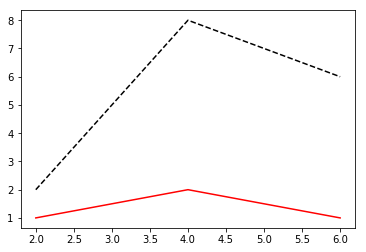

In [56]:
plt.plot(a, b, 'r-', a, c, 'k--');

This should just be a trivial example to let you see how those cells work AND that packages can be imported. You can find plenty of more advanced examples in online tutorials

## Working with scripts and functions

When you start creating funtions and classes, you may want to store them in external scripts rather than in notebook cells. This would allow the same functions to be used from multiple notebooks without having to copy them in each notebook. Moreover, it makes the notebook structure lean and easy to follow for both us and you after few months without touching the code.

You should have downloaded the folder 'docs', within which you can find the python file 'my_funct.py'. The file can be opened with any text editor (recommended Sublime Text 3) and directly edited. Inside you can define python functions or classes that can be used in the notebook. With the ending '.py' the file basically constitutes a new Python module whose name is the name of the file itself. The content of the module can be used after you import the model to the notebook:

In [6]:
import docs.my_funct as myf

This allows you to use in the notebook any of the classes or functions defined inside the script. For instance, we can use the `my_print` function by:

In [7]:
myf.my_print()

Hello World!


Note that we need to type `myf.` in front, because that is the name we gave to the module in this notebook and any of its functions must be called with the module's prefix.

Functions can also return something. In the following example we want to know what is the _greatest common divisor_ of a vector:

In [8]:
v = np.array([24, 42, 36, 96])

In [9]:
myf.get_vector_gcd(v)

6

All functions can be combined in the most convinient way

In [10]:
x = myf.get_vector_gcd(np.concatenate((v, np.array([75, 57, 138]))))
x

3

## iPython:

iPython is an extension of Python that allows for more interactive and supportive operations. It also comes already with Anaconda and you don't have to do anything but use it. Among the many possibilities (check out [iPython documentation](http://ipython.readthedocs.io/en/stable/interactive/index.html)), it allows to find out the type of object you are dealing with and learn about its properties:

In [11]:
x?

In [12]:
v?

In [13]:
myf.get_vector_gcd?

Another great feature of iPython is the presence of magic functions, which you call with the percentage symbol `%` as prefix. These functions perform more _meta-operations_ which can be very useful in your daily coding. For instance, the two following magics:

In [14]:
%load_ext autoreload
%autoreload 2

automatically reload all modules that you have imported, including the changes that you have performed on them. For instance, if you modify the module 'my_funct.py' and you save it, you will be able to use in the notebook the edited or new functions without having to manually reimport the module (`import docs.my_funct as myf` used above).

Another handy magic function is `%timeit`, which returns the time it takes to execute a command:

In [15]:
%timeit myf.get_vector_gcd([2,3,4])

The slowest run took 4.80 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 786 ns per loop


Most magics come as **line magics**: prefixed just with `%` and as input they take the content of the line where they are called. Some magic functions work also as **cell magics**: in these cases they are prefixed with `%%` and operate on the content of the entire cell:

In [16]:
%%timeit
vec = []
for j in range(12):
    vec.append(j)
vec = np.array(vec)

100000 loops, best of 3: 3.14 µs per loop


Note that the outcome of the piece of code analysed by `%%timeit` doens't leave the cell:

In [17]:
vec?

Object `vec` not found.


## Working with data

To handle actual data we strongly recommend to use **pandas**, a package that also comes with Anaconda and is ready to be used. Pandas has multiple applications and strengths, as its [extensive documentation](https://pandas.pydata.org/pandas-docs/stable/index.html) shows. In order not to get confused, we recommend to start from the brief introduction [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html). As any package, it must be firstly imported:

In [18]:
import pandas as pd

The main data structures that you will work with are Series and [DataFrames](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe). The latter in particular are a convenient way of storing a typical table of data, with rows representing the single items and columns the properties of those items. Dataframe can be constructed in diffeent ways, starting from python classics (list and dict), numpy.ndarray, exc... Here we want to show how to build it from an external data source, typically a csv saved locally.

In the docs folder you also find the file "SwissGeneration.csv", which contains the hourly generation mix of Switzerland by production type:

In [19]:
df = pd.read_csv("docs/SwissGeneration.csv", sep=',', header=0, index_col='Timestamp')
df.head(4)

,Hydro Pumped Storage [MW],Hydro Pumped Storage - Consumption [MW],Hydro Run-of-river and poundage [MW],Hydro Water Reservoir [MW],Nuclear [MW],Solar [MW],Wind Onshore [MW]
Timestamp,,,,,,,
29.01.2018 00:00,148,NaN,122,356,2832,0,3
29.01.2018 01:00,137,NaN,120,364,2833,0,3
29.01.2018 02:00,117,NaN,120,341,2831,0,3
29.01.2018 03:00,134,NaN,119,334,2830,0,4


Each cell of the table is identified by a row, normally referred to as **index**, and by a **column**. They characterise the entire DataFrame:

In [20]:
df.index

Index(['29.01.2018 00:00', '29.01.2018 01:00', '29.01.2018 02:00',
       '29.01.2018 03:00', '29.01.2018 04:00', '29.01.2018 05:00',
       '29.01.2018 06:00', '29.01.2018 07:00', '29.01.2018 08:00',
       '29.01.2018 09:00',
       ...
       '04.02.2018 14:00', '04.02.2018 15:00', '04.02.2018 16:00',
       '04.02.2018 17:00', '04.02.2018 18:00', '04.02.2018 19:00',
       '04.02.2018 20:00', '04.02.2018 21:00', '04.02.2018 22:00',
       '04.02.2018 23:00'],
      dtype='object', name='Timestamp', length=168)

In [21]:
df.columns

Index(['Hydro Pumped Storage [MW]', 'Hydro Pumped Storage - Consumption [MW]',
       'Hydro Run-of-river and poundage [MW]', 'Hydro Water Reservoir [MW]',
       'Nuclear [MW]', 'Solar [MW]', 'Wind Onshore [MW]'],
      dtype='object')

You can quickly get a taste of the content of the dataframe with `.describe()`:

In [22]:
df.describe()

,Hydro Pumped Storage [MW],Hydro Pumped Storage - Consumption [MW],Hydro Run-of-river and poundage [MW],Hydro Water Reservoir [MW],Nuclear [MW],Solar [MW],Wind Onshore [MW]
count,168.000000,0.0,168.000000,168.000000,168.000000,168.000000,168.000000
mean,670.452381,NaN,118.553571,1177.297619,2808.339286,19.494048,6.023810
std,535.540209,NaN,37.295672,796.945858,54.591222,34.198259,7.730453
min,64.000000,NaN,16.000000,263.000000,2532.000000,0.000000,0.000000
25%,186.250000,NaN,116.000000,397.500000,2805.750000,0.000000,1.000000
50%,568.500000,NaN,125.500000,979.000000,2828.000000,0.000000,3.000000
75%,996.250000,NaN,138.000000,1997.250000,2830.000000,28.250000,8.250000
max,2334.000000,NaN,175.000000,2803.000000,2841.000000,140.000000,32.000000


For selection, you can
- select by **label**, where you use the "names" of index e column. This is the most common method and it employs `.loc[idx,col]`:

In [23]:
df.loc['29.01.2018 02:00','Hydro Run-of-river and poundage [MW]']

120

- select by **position**, where you give the classical i,j coordinates (0 counts). You then use .iloc[i,j]:

In [24]:
df.iloc[2,2]

120

To select the entire column, you can skip the `.loc` command:

In [25]:
df['Hydro Pumped Storage [MW]']

Timestamp
29.01.2018 00:00     148
29.01.2018 01:00     137
29.01.2018 02:00     117
29.01.2018 03:00     134
29.01.2018 04:00     142
29.01.2018 05:00     252
29.01.2018 06:00    1507
29.01.2018 07:00    2326
29.01.2018 08:00    2050
29.01.2018 09:00    1516
29.01.2018 10:00     917
29.01.2018 11:00     801
29.01.2018 12:00     683
29.01.2018 13:00     358
29.01.2018 14:00     611
29.01.2018 15:00    1556
29.01.2018 16:00    1537
29.01.2018 17:00    2202
29.01.2018 18:00    2334
29.01.2018 19:00    1994
29.01.2018 20:00     818
29.01.2018 21:00     389
29.01.2018 22:00     516
29.01.2018 23:00     408
30.01.2018 00:00     286
30.01.2018 01:00     175
30.01.2018 02:00     149
30.01.2018 03:00     188
30.01.2018 04:00     179
30.01.2018 05:00     275
                    ... 
03.02.2018 18:00     926
03.02.2018 19:00     655
03.02.2018 20:00     535
03.02.2018 21:00     328
03.02.2018 22:00     188
03.02.2018 23:00     160
04.02.2018 00:00     140
04.02.2018 01:00     113
04.02.2018 02:0

and you can quickly extract several types of information:

In [26]:
df.mean()

Hydro Pumped Storage [MW]                   670.452381
Hydro Pumped Storage - Consumption [MW]            NaN
Hydro Run-of-river and poundage [MW]        118.553571
Hydro Water Reservoir [MW]                 1177.297619
Nuclear [MW]                               2808.339286
Solar [MW]                                   19.494048
Wind Onshore [MW]                             6.023810
dtype: float64

Currently the index is stored as a text, but we can tell pandas that the index of our DataFrame contains time information:

In [27]:
df.index = pd.to_datetime(df.index, format="%d.%m.%Y %H:%M")
df.index

DatetimeIndex(['2018-01-29 00:00:00', '2018-01-29 01:00:00',
               '2018-01-29 02:00:00', '2018-01-29 03:00:00',
               '2018-01-29 04:00:00', '2018-01-29 05:00:00',
               '2018-01-29 06:00:00', '2018-01-29 07:00:00',
               '2018-01-29 08:00:00', '2018-01-29 09:00:00',
               ...
               '2018-02-04 14:00:00', '2018-02-04 15:00:00',
               '2018-02-04 16:00:00', '2018-02-04 17:00:00',
               '2018-02-04 18:00:00', '2018-02-04 19:00:00',
               '2018-02-04 20:00:00', '2018-02-04 21:00:00',
               '2018-02-04 22:00:00', '2018-02-04 23:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=168, freq=None)

This allows to perform more powerful operations, like the selection of a single day:

In [28]:
df['2018-02-02'].describe()

,Hydro Pumped Storage [MW],Hydro Pumped Storage - Consumption [MW],Hydro Run-of-river and poundage [MW],Hydro Water Reservoir [MW],Nuclear [MW],Solar [MW],Wind Onshore [MW]
count,24.000000,0.0,24.000000,24.000000,24.000000,24.000000,24.000000
mean,855.458333,NaN,147.083333,1148.708333,2825.875000,28.541667,1.833333
std,459.472380,NaN,15.128196,654.431547,12.858131,47.882083,0.963087
min,149.000000,NaN,111.000000,294.000000,2767.000000,0.000000,0.000000
25%,496.000000,NaN,140.250000,550.500000,2827.750000,0.000000,1.000000
50%,1050.500000,NaN,149.500000,1175.000000,2828.000000,0.000000,2.000000
75%,1216.500000,NaN,159.250000,1438.000000,2829.000000,42.750000,2.000000
max,1432.000000,NaN,167.000000,2666.000000,2838.000000,138.000000,5.000000


or of an entire month:

In [29]:
df['2018-02'].describe()

,Hydro Pumped Storage [MW],Hydro Pumped Storage - Consumption [MW],Hydro Run-of-river and poundage [MW],Hydro Water Reservoir [MW],Nuclear [MW],Solar [MW],Wind Onshore [MW]
count,96.000000,0.0,96.000000,96.000000,96.000000,96.000000,96.000000
mean,587.947917,NaN,134.708333,974.572917,2817.052083,17.968750,5.062500
std,468.568332,NaN,18.967516,720.815996,38.212252,32.254727,6.736878
min,64.000000,NaN,100.000000,263.000000,2532.000000,0.000000,0.000000
25%,166.000000,NaN,120.000000,369.750000,2821.500000,0.000000,1.000000
50%,404.000000,NaN,130.000000,642.000000,2828.000000,0.000000,2.000000
75%,1041.750000,NaN,153.000000,1379.250000,2830.000000,23.500000,7.000000
max,1575.000000,NaN,175.000000,2666.000000,2841.000000,138.000000,32.000000


Also boolean selections are possible. To select all timestamps when there was no production from Solar:

In [30]:
df[df['Solar [MW]']==0].describe()

,Hydro Pumped Storage [MW],Hydro Pumped Storage - Consumption [MW],Hydro Run-of-river and poundage [MW],Hydro Water Reservoir [MW],Nuclear [MW],Solar [MW],Wind Onshore [MW]
count,98.000000,0.0,98.000000,98.000000,98.000000,98.0,98.000000
mean,513.397959,NaN,115.214286,904.816327,2800.163265,0.0,6.112245
std,502.925723,NaN,37.041145,730.582501,69.512395,0.0,8.101015
min,64.000000,NaN,16.000000,263.000000,2532.000000,0.0,0.000000
25%,156.250000,NaN,111.250000,357.250000,2801.500000,0.0,1.000000
50%,287.500000,NaN,123.000000,482.000000,2828.500000,0.0,3.000000
75%,658.000000,NaN,133.000000,1418.000000,2830.000000,0.0,7.000000
max,2334.000000,NaN,175.000000,2803.000000,2841.000000,0.0,32.000000


Almost any operation can be applied to both columns or rows. To compute the maximum value for each column on a specific day we can do:

In [34]:
df['2018-02-01'].max()

Hydro Pumped Storage [MW]                  1575.0
Hydro Pumped Storage - Consumption [MW]       NaN
Hydro Run-of-river and poundage [MW]        175.0
Hydro Water Reservoir [MW]                 2585.0
Nuclear [MW]                               2823.0
Solar [MW]                                   41.0
Wind Onshore [MW]                            32.0
dtype: float64

To get the maximum of each row we must specify to perform the operation along the "horizontal axis", which is axis 1 (axis 0 is the vertical):

In [35]:
df['2018-02-01'].max(axis=1)

Timestamp
2018-02-01 00:00:00    2801.0
2018-02-01 01:00:00    2801.0
2018-02-01 02:00:00    2803.0
2018-02-01 03:00:00    2805.0
2018-02-01 04:00:00    2806.0
2018-02-01 05:00:00    2809.0
2018-02-01 06:00:00    2810.0
2018-02-01 07:00:00    2810.0
2018-02-01 08:00:00    2808.0
2018-02-01 09:00:00    2809.0
2018-02-01 10:00:00    2804.0
2018-02-01 11:00:00    2795.0
2018-02-01 12:00:00    2795.0
2018-02-01 13:00:00    2796.0
2018-02-01 14:00:00    2795.0
2018-02-01 15:00:00    2796.0
2018-02-01 16:00:00    2796.0
2018-02-01 17:00:00    2810.0
2018-02-01 18:00:00    2822.0
2018-02-01 19:00:00    2823.0
2018-02-01 20:00:00    2731.0
2018-02-01 21:00:00    2532.0
2018-02-01 22:00:00    2661.0
2018-02-01 23:00:00    2736.0
dtype: float64

This last operation can be done also with the more flexible command `apply`: it can **apply any function** to each row or each column, depending on the specified axis:

In [36]:
df['2018-02-01'].apply(np.max, axis=1)

Timestamp
2018-02-01 00:00:00    2801.0
2018-02-01 01:00:00    2801.0
2018-02-01 02:00:00    2803.0
2018-02-01 03:00:00    2805.0
2018-02-01 04:00:00    2806.0
2018-02-01 05:00:00    2809.0
2018-02-01 06:00:00    2810.0
2018-02-01 07:00:00    2810.0
2018-02-01 08:00:00    2808.0
2018-02-01 09:00:00    2809.0
2018-02-01 10:00:00    2804.0
2018-02-01 11:00:00    2795.0
2018-02-01 12:00:00    2795.0
2018-02-01 13:00:00    2796.0
2018-02-01 14:00:00    2795.0
2018-02-01 15:00:00    2796.0
2018-02-01 16:00:00    2796.0
2018-02-01 17:00:00    2810.0
2018-02-01 18:00:00    2822.0
2018-02-01 19:00:00    2823.0
2018-02-01 20:00:00    2731.0
2018-02-01 21:00:00    2532.0
2018-02-01 22:00:00    2661.0
2018-02-01 23:00:00    2736.0
dtype: float64

The `apply` command is particularly useful when you want to apply user-defined functions. Suppose you want a function that returns 1 if the share of Solar is greater than 1% percent of total prouction, 0 otherwise. This function was created in the 'my_funct' module.

In [37]:
myf.specific_share?

The `apply` method can be then employed and it can be used to create a new column in the dataframe:

In [38]:
df.apply(lambda row: myf.specific_share(row.sum(),
                                        row['Solar [MW]'],
                                        0.01), axis=1)

Timestamp
2018-01-29 00:00:00    0
2018-01-29 01:00:00    0
2018-01-29 02:00:00    0
2018-01-29 03:00:00    0
2018-01-29 04:00:00    0
2018-01-29 05:00:00    0
2018-01-29 06:00:00    0
2018-01-29 07:00:00    0
2018-01-29 08:00:00    0
2018-01-29 09:00:00    0
2018-01-29 10:00:00    1
2018-01-29 11:00:00    1
2018-01-29 12:00:00    1
2018-01-29 13:00:00    1
2018-01-29 14:00:00    1
2018-01-29 15:00:00    0
2018-01-29 16:00:00    0
2018-01-29 17:00:00    0
2018-01-29 18:00:00    0
2018-01-29 19:00:00    0
2018-01-29 20:00:00    0
2018-01-29 21:00:00    0
2018-01-29 22:00:00    0
2018-01-29 23:00:00    0
2018-01-30 00:00:00    0
2018-01-30 01:00:00    0
2018-01-30 02:00:00    0
2018-01-30 03:00:00    0
2018-01-30 04:00:00    0
2018-01-30 05:00:00    0
                      ..
2018-02-03 18:00:00    0
2018-02-03 19:00:00    0
2018-02-03 20:00:00    0
2018-02-03 21:00:00    0
2018-02-03 22:00:00    0
2018-02-03 23:00:00    0
2018-02-04 00:00:00    0
2018-02-04 01:00:00    0
2018-02-04 02:0

This information can be stored in a new column of the dataframe

In [39]:
df['Some Sun'] = df.apply(lambda row: myf.specific_share(row.sum(),
                                                         row['Solar [MW]'],
                                                         0.01), axis=1)
df.describe()

,Hydro Pumped Storage [MW],Hydro Pumped Storage - Consumption [MW],Hydro Run-of-river and poundage [MW],Hydro Water Reservoir [MW],Nuclear [MW],Solar [MW],Wind Onshore [MW],Some Sun
count,168.000000,0.0,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,670.452381,NaN,118.553571,1177.297619,2808.339286,19.494048,6.023810,0.160714
std,535.540209,NaN,37.295672,796.945858,54.591222,34.198259,7.730453,0.368365
min,64.000000,NaN,16.000000,263.000000,2532.000000,0.000000,0.000000,0.000000
25%,186.250000,NaN,116.000000,397.500000,2805.750000,0.000000,1.000000,0.000000
50%,568.500000,NaN,125.500000,979.000000,2828.000000,0.000000,3.000000,0.000000
75%,996.250000,NaN,138.000000,1997.250000,2830.000000,28.250000,8.250000,0.000000
max,2334.000000,NaN,175.000000,2803.000000,2841.000000,140.000000,32.000000,1.000000


Another important feature of pandas is to perform operation on **groups** of data. These groups must firstly be mapped according to some criteria, for instance hour of the day. Then an aggregated operation can be applied to them. If we want to know the average production of each asset by hour of the day:

In [40]:
df.groupby(by=df.index.hour).mean()

,Hydro Pumped Storage [MW],Hydro Pumped Storage - Consumption [MW],Hydro Run-of-river and poundage [MW],Hydro Water Reservoir [MW],Nuclear [MW],Solar [MW],Wind Onshore [MW],Some Sun
Timestamp,,,,,,,,
0,202.714286,NaN,113.000000,408.142857,2777.285714,0.000000,7.000000,0.000000
1,144.285714,NaN,103.428571,357.857143,2807.142857,0.000000,6.714286,0.000000
2,132.142857,NaN,100.142857,342.857143,2813.142857,0.000000,5.571429,0.000000
3,131.857143,NaN,102.857143,332.142857,2818.285714,0.000000,5.142857,0.000000
4,145.428571,NaN,114.857143,328.714286,2820.714286,0.000000,4.428571,0.000000
5,224.571429,NaN,115.571429,460.857143,2821.285714,0.000000,4.000000,0.000000
6,617.571429,NaN,123.285714,1155.857143,2820.142857,0.000000,3.714286,0.000000
7,1184.000000,NaN,129.857143,1713.571429,2819.857143,0.000000,4.428571,0.000000
8,1230.857143,NaN,128.714286,1943.142857,2819.714286,5.571429,4.285714,0.000000


Or we can group data depending on the value of a column. For instance, we may want to know the the average production of each asset depending on whether 'Some Sun' is 1 or not:

In [41]:
df.groupby(by='Some Sun').mean()

,Hydro Pumped Storage [MW],Hydro Pumped Storage - Consumption [MW],Hydro Run-of-river and poundage [MW],Hydro Water Reservoir [MW],Nuclear [MW],Solar [MW],Wind Onshore [MW]
Some Sun,,,,,,,
0,686.156028,NaN,118.354610,1182.014184,2804.964539,6.680851,6.723404
1,588.444444,NaN,119.592593,1152.666667,2825.962963,86.407407,2.370370


Finally, pandas helps making quick **plots**

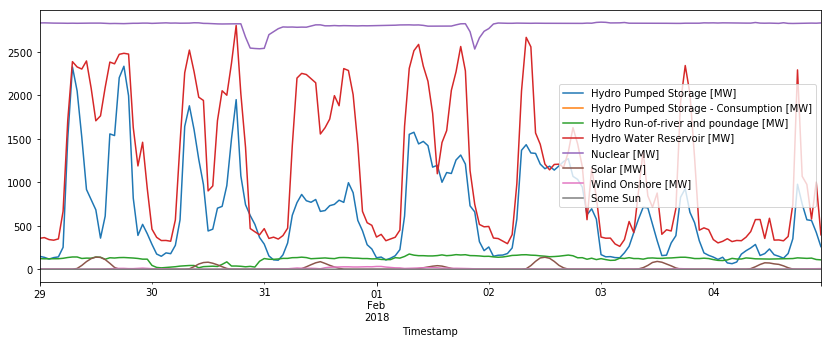

In [64]:
fig, ax1 = plt.subplots(figsize=(14,5))
df.plot(ax=ax1);

We can improve the above plot by stacking the different assets on top of eact other, and excluding the column "Some Sun" from the analysis

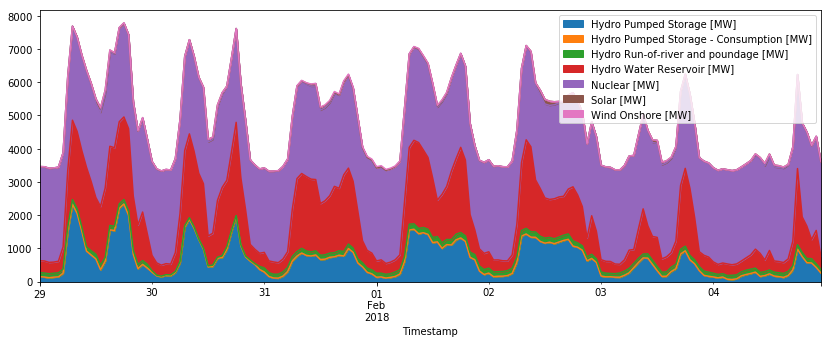

In [68]:
fig, ax1 = plt.subplots(figsize=(14,5))
df[df.columns.drop("Some Sun")].plot(kind='area', ax=ax1);

Usual selection methods can be employed (rememebr that to slice both by **index** and **columns** the `.loc[idx, col]` method must be used)

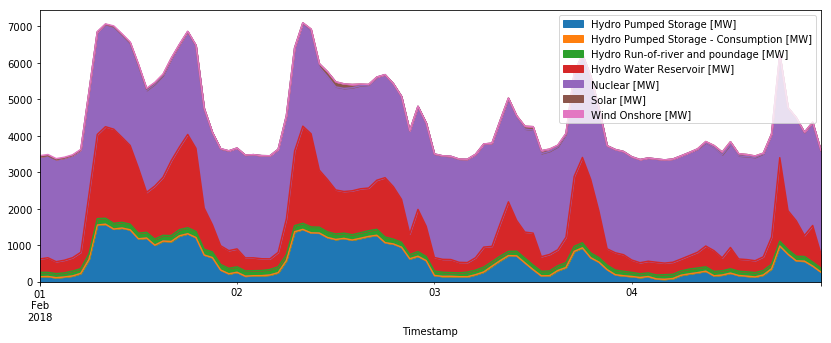

In [86]:
fig, ax1 = plt.subplots(figsize=(14,5))
df.loc['2018-02', df.columns.drop("Some Sun")].plot(kind='area', ax=ax1);

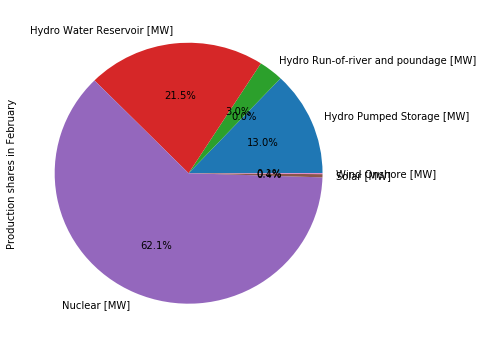

In [116]:
fig, ax1 = plt.subplots(figsize=(6,6))
df.loc['2018-02', df.columns.drop("Some Sun")].sum().plot(kind='pie',
                                                          ax=ax1,
                                                          label='Production shares in February',
                                                          autopct='%.1f%%');

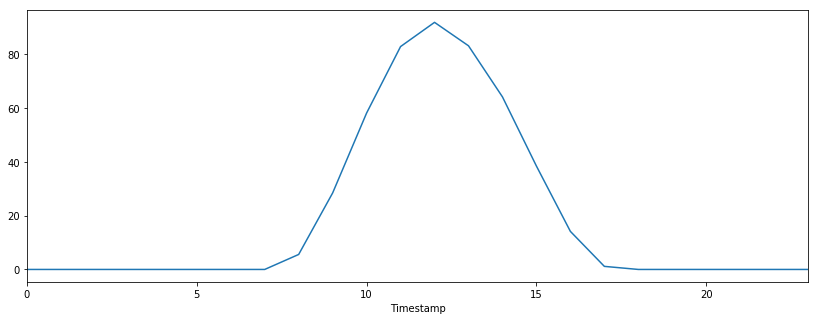

In [85]:
fig, ax1 = plt.subplots(figsize=(14,5))
df['Solar [MW]'].groupby(df.index.hour).mean().plot(ax=ax1);

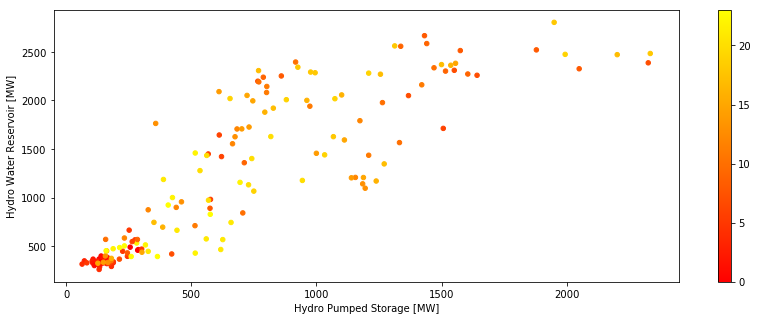

In [99]:
fig, ax1 = plt.subplots(figsize=(14,5))
df.plot(x='Hydro Pumped Storage [MW]',
        y='Hydro Water Reservoir [MW]',
        kind='scatter',
        c=df.index.hour,
        cmap='autumn',
        colorbar=True,
        ax=ax1);

This is the end of the gettingStarted notebook. We hope we were able to show you the functioning principle and usability of the jupyter notebook in combination with different modules and packages. Good luck and have fun with your project!